In [100]:
import pandas as pd
import seaborn as sns

In [101]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_csv('auto-mpg.data', names = column_names)
data.describe(),data.head(5)

(              mpg   cylinders  displacement       weight  acceleration  \
 count  398.000000  398.000000    398.000000   398.000000    398.000000   
 mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
 std      7.815984    1.701004    104.269838   846.841774      2.757689   
 min      9.000000    3.000000     68.000000  1613.000000      8.000000   
 25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
 50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
 75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
 max     46.600000    8.000000    455.000000  5140.000000     24.800000   
 
        model year      origin  
 count  398.000000  398.000000  
 mean    76.010050    1.572864  
 std      3.697627    0.802055  
 min     70.000000    1.000000  
 25%     73.000000    1.000000  
 50%     76.000000    1.000000  
 75%     79.000000    2.000000  
 max     82.000000    3.000000  ,
     mpg  cylinders  disp

## Question - 1 : There are 398 cars in total and dataset contains 8 attributes

## Question - 2

In [102]:
# Splitting up car name column into two fileds company and car name
car = pd.DataFrame(data['car name'].str.split(' ', 1).tolist(), columns = ['company', 'car name'])
data = data.drop(['car name'], axis=1)
data = pd.concat([data, car], axis=1)
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford,torino


In [103]:
data = data.replace(to_replace=['chevy', 'chevroelt'], value='chevrolet')
data = data.replace(to_replace=['maxda'], value='mazda')
data = data.replace(to_replace=['vw', 'vokswagen'], value='volkswagen')
data = data.replace(to_replace=['mercedes'], value='mercedes-benz')
data = data.replace(to_replace=['toyouta'], value='toyota')
print(len(data['company'].unique()))
# There are 30 disctict car companies in the given data set

index = data['mpg'] == data['mpg'].max()
print(data.loc[index]['company'] + ' ' + data.loc[index]['car name'])
# mazda glc has ighest mpg

index = data['cylinders'] == 8
print(data.loc[index]['company'].value_counts())
# ford, chevrolet has produced more 8 cylinder cars which counts to 20

index = data['cylinders'] == 3
print(data.loc[index]['company'] + ' ' + data.loc[index]['car name'])
# mazda rx2 coupe, maxda rx3, mazda rx-4, mazda rx-7 gs has produced 3 cylinder cars

30
322    mazda glc
dtype: object
chevrolet     20
ford          20
dodge         12
plymouth      10
amc            8
pontiac        7
oldsmobile     7
buick          7
mercury        5
chrysler       4
cadillac       2
hi             1
Name: company, dtype: int64
71     mazda rx2 coupe
111          mazda rx3
243         mazda rx-4
334      mazda rx-7 gs
dtype: object


## Question - 3

In [104]:
data.mean(), data.std()

(mpg               23.514573
 cylinders          5.454774
 displacement     193.425879
 weight          2970.424623
 acceleration      15.568090
 model year        76.010050
 origin             1.572864
 dtype: float64,
 mpg               7.815984
 cylinders         1.701004
 displacement    104.269838
 weight          846.841774
 acceleration      2.757689
 model year        3.697627
 origin            0.802055
 dtype: float64)

## Question 4

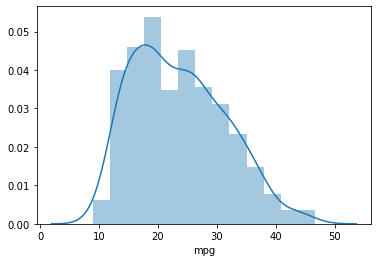

In [105]:
sns.distplot(data['mpg'])

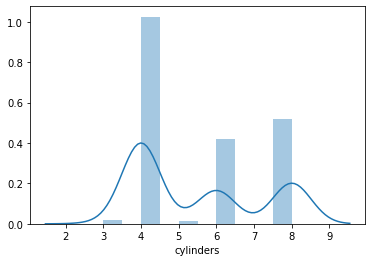

In [106]:
sns.distplot(data['cylinders'], bins=10)

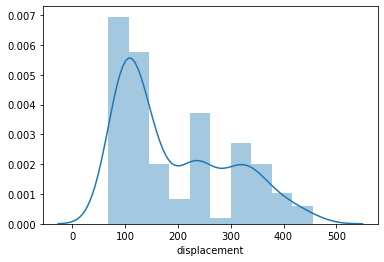

In [107]:
sns.distplot(data['displacement'])

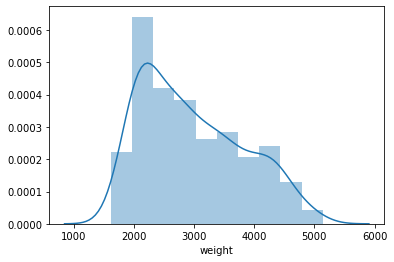

In [108]:
sns.distplot(data['weight'])

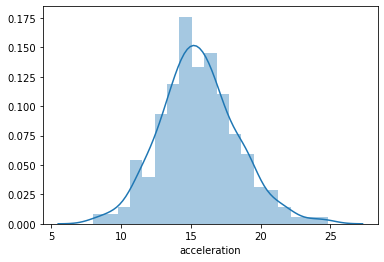

In [109]:
sns.distplot(data['acceleration'])

## Question 5

-0.8317409332443354

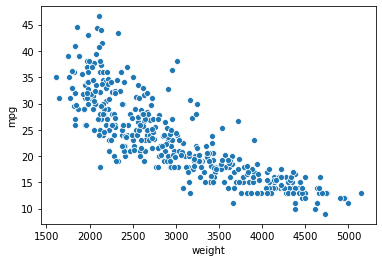

In [110]:
sns.scatterplot(x='weight', y='mpg', data=data)
data['weight'].corr(data['mpg'])
# As we see from the graph the value of y decreases as the value of x increases, 
# hence they two are negatively correlated.

## Question 6

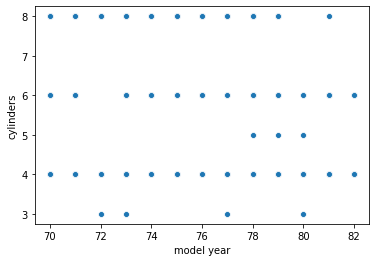

In [111]:
sns.scatterplot(x='model year', y='cylinders', data=data)
# As we can see from the plot,
# 4, 6, 8 cylinder cars were in production in most of the years
# 5, 3 cylinder cars did not last longer there are huge gaps in production between years

## Question 7

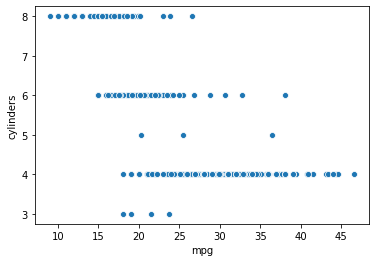

In [112]:
sns.scatterplot(x='mpg', y='cylinders', data=data)
# It's interesting to know that 4 cylinder cars gives the most mpg

-0.41745731994039337

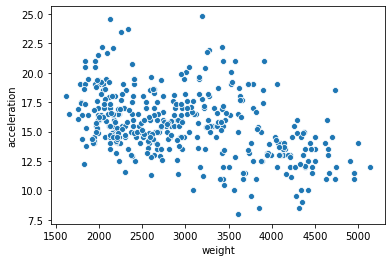

In [113]:
sns.scatterplot(x='weight', y='acceleration', data=data)
data['weight'].corr(data['acceleration'])
# It's interesting to know that the acceleration keeps decreasing as the weight increases
# Hence, they're negatively correlated

## Question 8

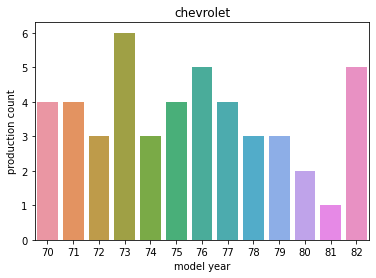

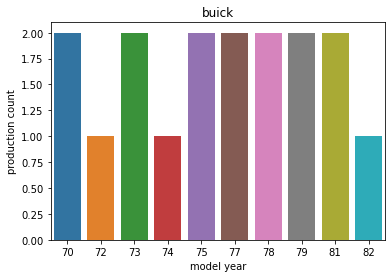

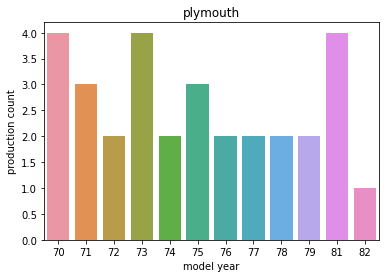

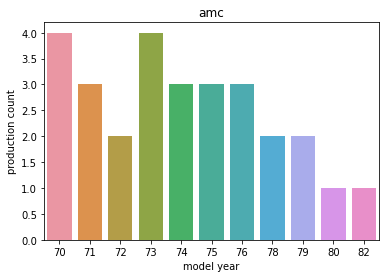

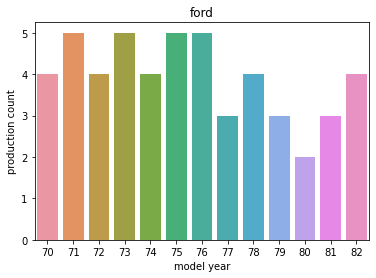

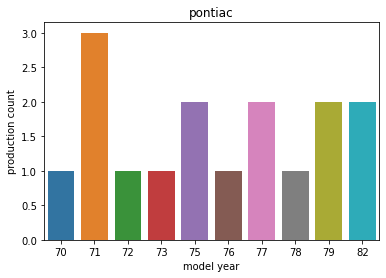

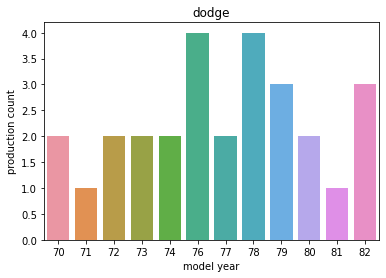

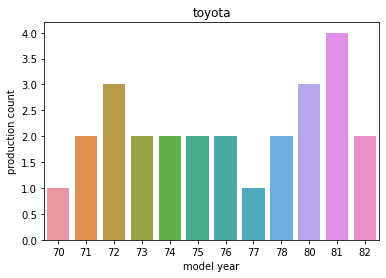

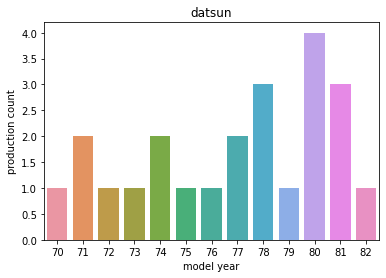

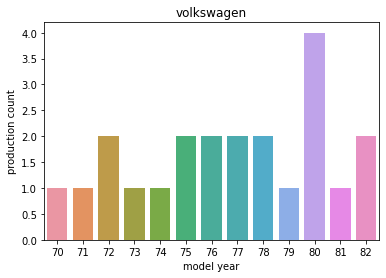

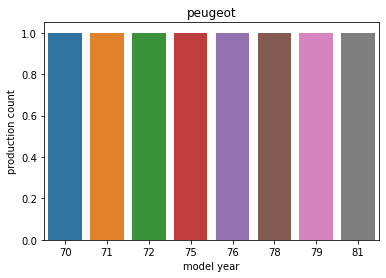

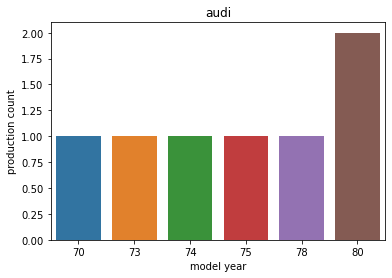

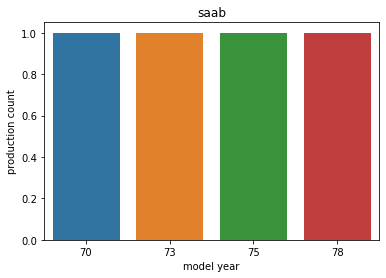

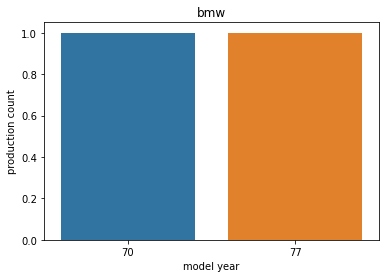

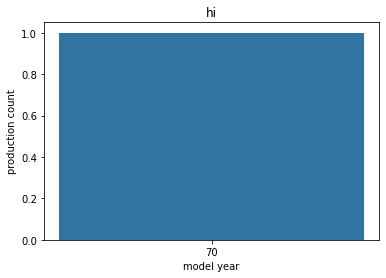

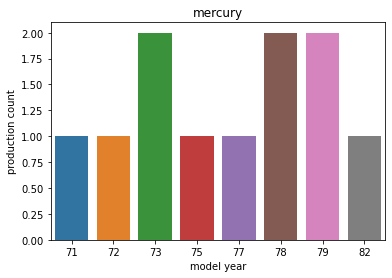

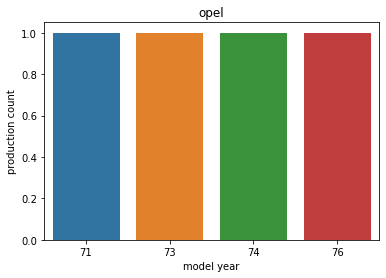

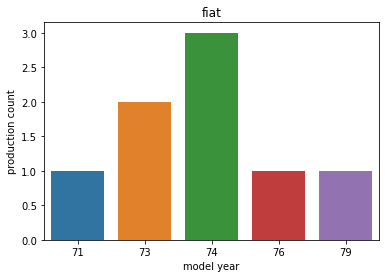

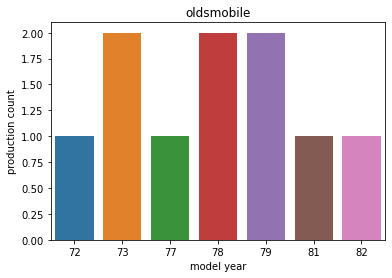

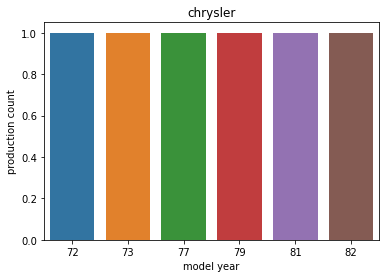

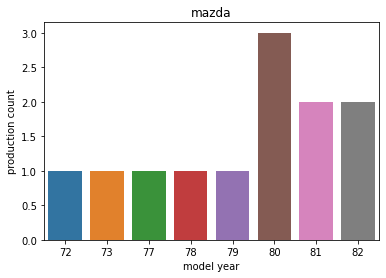

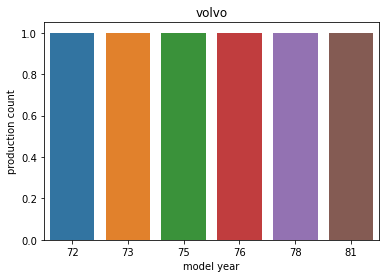

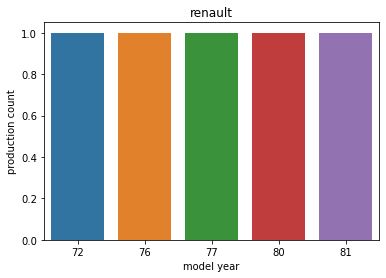

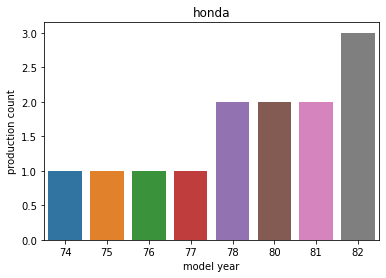

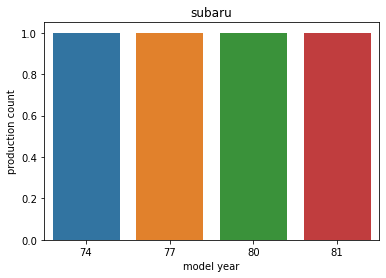

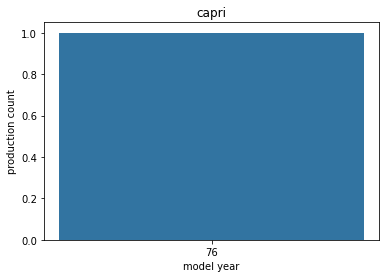

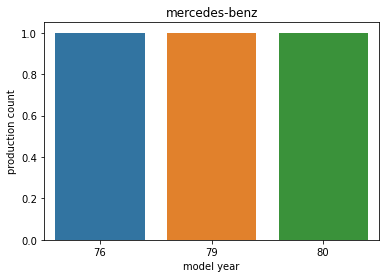

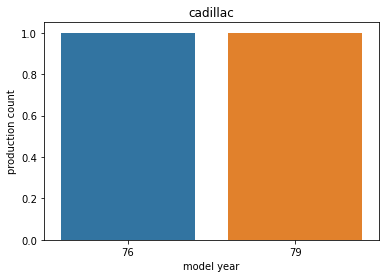

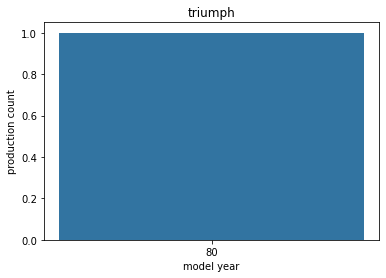

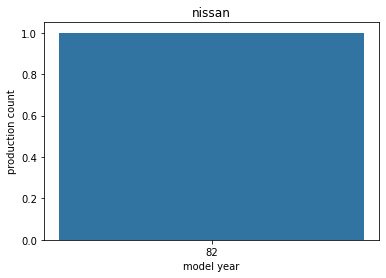

<Figure size 432x288 with 0 Axes>

In [115]:
import matplotlib.pyplot as plt
for company in data['company'].unique():
    car = data.loc[data['company'] == company]['model year'].value_counts()
    sns.barplot(x = car.index, y = car).set(xlabel = 'model year', ylabel = 'production count', title = company)
    plt.figure()

## Question 9

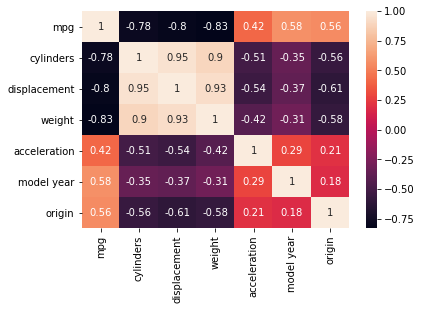

In [116]:
sns.heatmap(data.corr(), annot=True)